# Import Libraries

In [98]:
import os
import numpy as np 
import seaborn as sns
import pandas as pd 
from tamil import utf8
import matplotlib.pyplot as plt

### Helper Functions

In [50]:
def get_str_len(string):
    return len(utf8.get_letters(string))

In [51]:
all_tamil_words = open('unique_sorted_words_in_all_words_20200604-133955.txt',mode='r',encoding='utf-8').read()

True

In [52]:
tamil_wrds = pd.DataFrame({'words':all_tamil_words.split('\n')})

In [78]:
tamil_df = tamil_wrds.value_counts().reset_index(name='Frequency')

In [79]:
print("Main Data Frame Shape ", tamil_df.shape)

Main Data Frame Shape  (2583002, 2)


In [80]:
tamil_df['char_len'] = tamil_df.words.apply(get_str_len)

In [81]:
tamil_df.head(3)

,words,Frequency,char_len
0,,1,0
1,பிறிஞ்சி,1,4
2,பிறிகுவென்,1,5


Save DataFrame to File

In [82]:
tamil_df.to_csv("outputs/tamil_words_char_len.csv",index=False)

# Data Cleaning
1. Remove words which have length less than 2


In [83]:
tamil_df.shape

(2583002, 3)

In [84]:
tamil_df = tamil_df[tamil_df.char_len>=2]

In [85]:
tamil_df.shape

(2582552, 3)

In [86]:
# tamil_df.to_csv("outputs/tamil_words_cleaned.csv",index=False)

# Sorted 

In [87]:
tamil_df = tamil_df.sort_values('char_len',ascending=False)

In [88]:
tamil_df.char_len.quantile([i/20 for i in range(21)])

0.00      2.0
0.05      3.0
0.10      4.0
0.15      4.0
0.20      5.0
0.25      5.0
0.30      5.0
0.35      5.0
0.40      5.0
0.45      6.0
0.50      6.0
0.55      6.0
0.60      7.0
0.65      7.0
0.70      7.0
0.75      8.0
0.80      8.0
0.85      9.0
0.90      9.0
0.95     11.0
1.00    246.0
Name: char_len, dtype: float64

### Remove words whicha re greater than 15

In [89]:
tamil_df = tamil_df[tamil_df.char_len<=15]

In [90]:
print("Cleaned DataFrame Shape",tamil_df.shape)

Cleaned DataFrame Shape (2557643, 3)


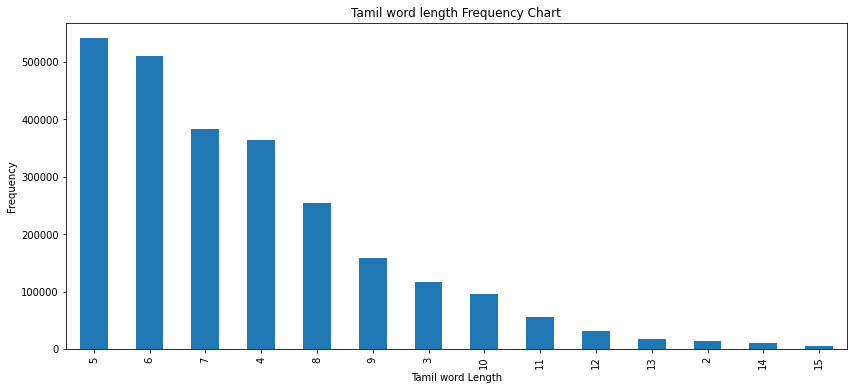

In [116]:
tamil_df.char_len.value_counts().plot(kind='bar',title="Tamil word length Frequency Chart",figsize=(14,6))
plt.xlabel('Tamil word Length')
plt.ylabel('Frequency')

plt.savefig('images/Frequency_Chart.png',bbox_inches='tight')

In [91]:
tamil_df.to_csv("outputs/tamil_words_cleaned.csv",index=False)